<a href="https://colab.research.google.com/github/mercyIfeoluwa/Technidus-Machine-Learning-Comptition/blob/master/Prediction_of_Customer's_Purchase_Behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task Description**

In this notebook i will using my understanding of machine learning concepts learnt to create a model to predict a customers purchase behaviour. I will be using a bike company's customer data to create a classification model that predicts a customer's likelihood to buy a bike. 
The data includes demographic features and information about purchases they have made (purchase history of the customers). The Bike company is particularly interested in determining any apparent relationships between demographic features known about the customers and whether they will buy a bike. The notebook will be presented as follow: Data Preprocessing & Cleansing Exploratory data analysis & Visualisation Feature Engineering Data Modeling Evaluting the Model Conclusion

**Goal**

The goal is to predict the customers' purchase behaviour.

In [2]:
#UPLOAD
from google.colab import files
uploaded = files.upload()

Saving submission.csv to submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [0]:

#IMPORT LIBRARIES
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from datetime import datetime
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from scipy import stats
from scipy.stats import norm, skew
from xgboost import XGBClassifier
from matplotlib import dates



In [83]:
#Reading out data from the dataset
#INITIATING TRAINING AND TEST DATA
train_data = pd.read_csv('train.csv')
#Viewing the first 5 rows
train_data.head()


,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,14540.0,NaN,Randy,NaN,Lin,NaN,8848 Auburn,NaN,London,England,United Kingdom,W1Y 3RA,1 (11) 500 555-0138,4/18/1958,Bachelors,Manual,M,M,1.0,0.0,0.0,1.0,35455.0,70.0,1
1,18054.0,NaN,Jake,NaN,Zeng,NaN,4058 First Ave,NaN,Cliffside,British Columbia,Canada,V8Y 1L1,987-555-0118,10/6/1960,Bachelors,Professional,M,S,0.0,1.0,0.0,0.0,43980.0,69.0,0
2,16955.0,NaN,Nathaniel,NaN,Bradley,NaN,3679 Diablo View Road,NaN,Metchosin,British Columbia,Canada,V9,145-555-0167,8/18/1969,Bachelors,Skilled Manual,M,M,1.0,0.0,2.0,2.0,57713.0,102.0,0
3,11626.0,NaN,Destiny,NaN,Rogers,NaN,3588 Vancouver Way,NaN,San Francisco,California,United States,94109,262-555-0170,6/14/1973,Graduate Degree,Skilled Manual,F,M,1.0,0.0,0.0,1.0,53438.0,49.0,0
4,18651.0,NaN,Isaiah,A,Mitchell,NaN,5014 Steele Drive,NaN,Lynnwood,Washington,United States,98036,694-555-0195,5/6/1955,High School,Clerical,M,M,0.0,2.0,0.0,1.0,55291.0,73.0,0


In [84]:
#Viewing the last 5 rows
train_data.tail()


,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
7681,19195.0,NaN,Darren,A,Romero,NaN,5038 Kenwal Rd,NaN,Birmingham,England,United Kingdom,B29 6SL,1 (11) 500 555-0150,5/26/1970,Partial College,Clerical,M,S,1.0,0.0,2.0,2.0,52622.0,87.0,1
7682,22174.0,NaN,Micah,NaN,Lu,NaN,5710 Ida Drive,NaN,Perth,South Australia,Australia,6006,1 (11) 500 555-0182,5/2/1952,High School,Skilled Manual,M,M,1.0,2.0,0.0,3.0,50085.0,73.0,0
7683,17665.0,NaN,Zachary,NaN,Jenkins,NaN,8922 Big Canyon Road,NaN,Oregon City,Oregon,United States,97045,560-555-0168,4/16/1955,High School,Clerical,M,M,0.0,2.0,0.0,2.0,50985.0,69.0,0
7684,12148.0,NaN,Gabrielle,A,Morris,NaN,8553 R St.,NaN,Salem,Oregon,United States,97301,458-555-0132,12/6/1964,Partial College,Professional,F,S,1.0,0.0,2.0,5.0,102378.0,72.0,1
7685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3814


In [101]:
#Drop last row; 7685
train_data = train_data[:-1]
train_data.tail()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age
7679,20417.0,NaN,Bruce,P,Vazquez,NaN,6592 Bent Tree Lane,NaN,South Melbourne,Victoria,Australia,3205,1 (11) 500 555-0178,1950-02-11,Partial College,Clerical,M,M,0.0,2.0,0.0,3.0,47035.0,71.0,0,70.128784
7680,13836.0,NaN,Dominic,C,Sara,NaN,Altendorfer Straße 70,NaN,Hof,Bayern,Germany,95010,1 (11) 500 555-0113,1976-04-07,Partial College,Clerical,M,S,0.0,1.0,0.0,0.0,51903.0,68.0,1,43.976296
7681,19195.0,NaN,Darren,A,Romero,NaN,5038 Kenwal Rd,NaN,Birmingham,England,United Kingdom,B29 6SL,1 (11) 500 555-0150,1970-05-26,Partial College,Clerical,M,S,1.0,0.0,2.0,2.0,52622.0,87.0,1,49.843631
7682,22174.0,NaN,Micah,NaN,Lu,NaN,5710 Ida Drive,NaN,Perth,South Australia,Australia,6006,1 (11) 500 555-0182,1952-05-02,High School,Skilled Manual,M,M,1.0,2.0,0.0,3.0,50085.0,73.0,0,67.908341
7683,17665.0,NaN,Zachary,NaN,Jenkins,NaN,8922 Big Canyon Road,NaN,Oregon City,Oregon,United States,97045,560-555-0168,1955-04-16,High School,Clerical,M,M,0.0,2.0,0.0,2.0,50985.0,69.0,0,64.954140


In [102]:
train_data.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age
count,7684.000000,7684.000000,7684.000000,7684.000000,7684.000000,7684.000000,7684.000000,7684.000000,7684.000000
mean,18764.074310,0.696642,1.569235,1.230739,2.151093,82321.049323,76.384565,0.496226,57.702273
std,4832.154439,0.459738,1.177812,1.650273,1.727181,40370.296042,29.369182,0.500018,10.576369
min,11001.000000,0.000000,0.000000,0.000000,0.000000,10063.000000,26.000000,0.000000,39.256145
25%,14676.750000,0.000000,1.000000,0.000000,1.000000,50782.000000,53.000000,0.000000,49.952463
50%,18495.000000,1.000000,2.000000,0.000000,2.000000,82154.000000,71.000000,0.000000,56.281819
75%,22394.250000,1.000000,2.000000,2.000000,4.000000,109395.750000,89.000000,1.000000,64.261449
max,29482.000000,1.000000,4.000000,5.000000,5.000000,193721.000000,176.000000,1.000000,108.311635


In [103]:
train_data.columns

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'AveMonthSpend', 'BikeBuyer', 'Age'],
      dtype='object')

**Dataset Description**
The above dataset is quite interesting because it is a good mixture of categorical and numerical attributes. The dataset comprised of 25 different attributes of 7685 customers. The customers were described as either ‘Yes’ (1) or ‘No’ (0) on the basis of bike buyer or not. There are few missing values also. There are mainly two classes’ bike buyers or not.From the above tables it is clearly visible that only CustomerID, HomeOwnerFlag,	NumberCarsOwned	NumberChildrenAtHome,	TotalChildren,	YearlyIncome,	AveMonthSpend,	BikeBuyer
are real valued integers. 



**Data Preprocessing**
We will read the data from dataset and replace the null values. 

In [104]:
train_data.isnull().any()

CustomerID              False
Title                    True
FirstName               False
MiddleName               True
LastName                False
Suffix                   True
AddressLine1            False
AddressLine2             True
City                    False
StateProvinceName       False
CountryRegionName       False
PostalCode              False
PhoneNumber             False
BirthDate               False
Education               False
Occupation              False
Gender                  False
MaritalStatus           False
HomeOwnerFlag           False
NumberCarsOwned         False
NumberChildrenAtHome    False
TotalChildren           False
YearlyIncome            False
AveMonthSpend           False
BikeBuyer               False
Age                     False
dtype: bool

In [105]:
train_data.isnull().sum()

CustomerID                 0
Title                   7643
FirstName                  0
MiddleName              3228
LastName                   0
Suffix                  7683
AddressLine1               0
AddressLine2            7549
City                       0
StateProvinceName          0
CountryRegionName          0
PostalCode                 0
PhoneNumber                0
BirthDate                  0
Education                  0
Occupation                 0
Gender                     0
MaritalStatus              0
HomeOwnerFlag              0
NumberCarsOwned            0
NumberChildrenAtHome       0
TotalChildren              0
YearlyIncome               0
AveMonthSpend              0
BikeBuyer                  0
Age                        0
dtype: int64

In [106]:
train_data['Title'].unique()

array([nan, 'Ms.', 'Sr.', 'Mr.'], dtype=object)

In [0]:
 data = train_data

From the dataset the birthdate of our customers have been given instead of the cage. We will have to convert the birth date to age

In [0]:
#Alternative method for age calculation
data['BirthDate'] = pd.to_datetime(data['BirthDate'])  #to convert the Birthdate data type
now = datetime.now()    
data['Age'] = now - data['BirthDate'] 
data['Age'] = data['Age'] /  np.timedelta64(1, 'Y')

In [0]:
def round_age(age):
  return int(round(age))

In [0]:
data['Age'] = data['Age'].map(round_age)

In [112]:
data.head(3)

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age
0,14540.0,NaN,Randy,NaN,Lin,NaN,8848 Auburn,NaN,London,England,United Kingdom,W1Y 3RA,1 (11) 500 555-0138,1958-04-18,Bachelors,Manual,M,M,1.0,0.0,0.0,1.0,35455.0,70.0,1,62
1,18054.0,NaN,Jake,NaN,Zeng,NaN,4058 First Ave,NaN,Cliffside,British Columbia,Canada,V8Y 1L1,987-555-0118,1960-10-06,Bachelors,Professional,M,S,0.0,1.0,0.0,0.0,43980.0,69.0,0,59
2,16955.0,NaN,Nathaniel,NaN,Bradley,NaN,3679 Diablo View Road,NaN,Metchosin,British Columbia,Canada,V9,145-555-0167,1969-08-18,Bachelors,Skilled Manual,M,M,1.0,0.0,2.0,2.0,57713.0,102.0,0,51


I will drop the 'BirthDate' column as it has been transformed into the Age feature.

In [0]:
#dropping BirthDate
data.drop('BirthDate', axis = 1, inplace = True)


In [117]:
data.head(3)

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age
0,14540.0,NaN,Randy,NaN,Lin,NaN,8848 Auburn,NaN,London,England,United Kingdom,W1Y 3RA,1 (11) 500 555-0138,Bachelors,Manual,M,M,1.0,0.0,0.0,1.0,35455.0,70.0,1,62
1,18054.0,NaN,Jake,NaN,Zeng,NaN,4058 First Ave,NaN,Cliffside,British Columbia,Canada,V8Y 1L1,987-555-0118,Bachelors,Professional,M,S,0.0,1.0,0.0,0.0,43980.0,69.0,0,59
2,16955.0,NaN,Nathaniel,NaN,Bradley,NaN,3679 Diablo View Road,NaN,Metchosin,British Columbia,Canada,V9,145-555-0167,Bachelors,Skilled Manual,M,M,1.0,0.0,2.0,2.0,57713.0,102.0,0,51


In [123]:
len(data['PostalCode'].unique())

301

We can see that for some customers, we dont have information on their Title, Middlename, Suffix and AddressLine 2 as indicated by the number of null values. 
These missing information are not strong indicators on whether a customer will purchase a bike or not. However, lets try to understand why they are missing. So, for most of these values it could imply that the reason why they are missing is because they were intentionally not filled by the customer because it doesn't apply to them.  For the purpose of what we are are trying to achieve with this datset, we will be dropping these columns and others that are irrelevant to predicting whether a customer will purchase a bike or not. 

In [0]:
data = data.drop (['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'PhoneNumber'], axis=1)


In [125]:
#Confirming that there is no null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7684 entries, 0 to 7683
Data columns (total 16 columns):
City                    7684 non-null object
StateProvinceName       7684 non-null object
CountryRegionName       7684 non-null object
PostalCode              7684 non-null object
Education               7684 non-null object
Occupation              7684 non-null object
Gender                  7684 non-null object
MaritalStatus           7684 non-null object
HomeOwnerFlag           7684 non-null float64
NumberCarsOwned         7684 non-null float64
NumberChildrenAtHome    7684 non-null float64
TotalChildren           7684 non-null float64
YearlyIncome            7684 non-null float64
AveMonthSpend           7684 non-null float64
BikeBuyer               7684 non-null int64
Age                     7684 non-null int64
dtypes: float64(6), int64(2), object(8)
memory usage: 960.6+ KB


In [126]:
#Confirming final dataset after preprocessing
data.head()

,City,StateProvinceName,CountryRegionName,PostalCode,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age
0,London,England,United Kingdom,W1Y 3RA,Bachelors,Manual,M,M,1.0,0.0,0.0,1.0,35455.0,70.0,1,62
1,Cliffside,British Columbia,Canada,V8Y 1L1,Bachelors,Professional,M,S,0.0,1.0,0.0,0.0,43980.0,69.0,0,59
2,Metchosin,British Columbia,Canada,V9,Bachelors,Skilled Manual,M,M,1.0,0.0,2.0,2.0,57713.0,102.0,0,51
3,San Francisco,California,United States,94109,Graduate Degree,Skilled Manual,F,M,1.0,0.0,0.0,1.0,53438.0,49.0,0,47
4,Lynnwood,Washington,United States,98036,High School,Clerical,M,M,0.0,2.0,0.0,1.0,55291.0,73.0,0,65


In [127]:
data['Education'].value_counts()

Bachelors              2294
Partial College        2116
High School            1361
Graduate Degree        1324
Partial High School     589
Name: Education, dtype: int64

In [128]:
data['Occupation'].value_counts()

Professional      2484
Skilled Manual    1845
Management        1330
Clerical          1095
Manual             930
Name: Occupation, dtype: int64

In [129]:
data.dtypes

City                     object
StateProvinceName        object
CountryRegionName        object
PostalCode               object
Education                object
Occupation               object
Gender                   object
MaritalStatus            object
HomeOwnerFlag           float64
NumberCarsOwned         float64
NumberChildrenAtHome    float64
TotalChildren           float64
YearlyIncome            float64
AveMonthSpend           float64
BikeBuyer                 int64
Age                       int64
dtype: object

**Exploratory - Data Analysis and Visualization**

In [131]:
data.head(2)

,City,StateProvinceName,CountryRegionName,PostalCode,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age
0,London,England,United Kingdom,W1Y 3RA,Bachelors,Manual,M,M,1.0,0.0,0.0,1.0,35455.0,70.0,1,62
1,Cliffside,British Columbia,Canada,V8Y 1L1,Bachelors,Professional,M,S,0.0,1.0,0.0,0.0,43980.0,69.0,0,59


In [0]:
#Seperating numerical columns from categorical colunms
numerical_cols=['YearlyIncome','AveMonthSpend','Age','HomeOwnerFlag','NumberCarsOwned','NumberChildrenAtHome','TotalChildren','BikeBuyer']
categorical_cols=['CountryRegionName','StateProvinceName', 'Education','Occupation','Gender','MaritalStatus','PostalCode','City']

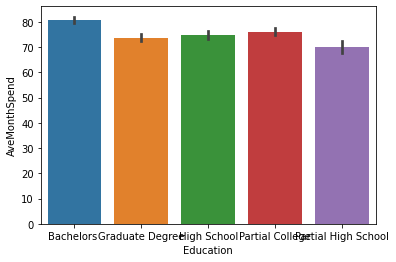

In [133]:
sns.barplot(data['Education'],data["AveMonthSpend"])
plt.show()

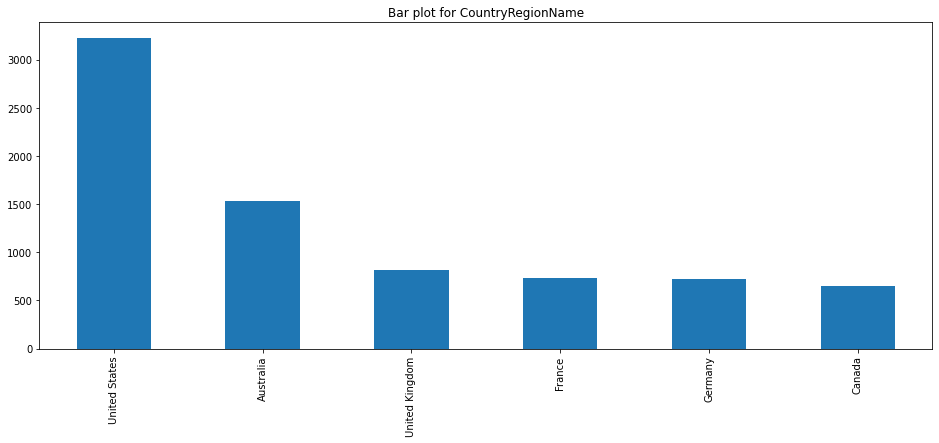

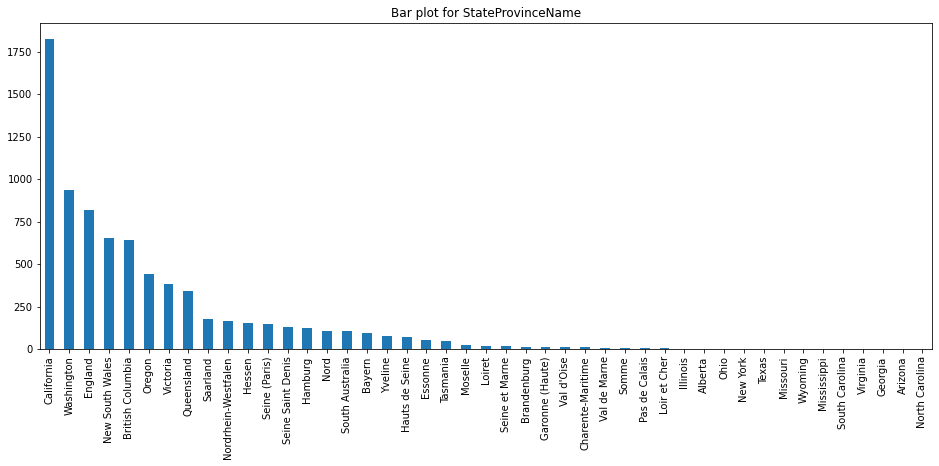

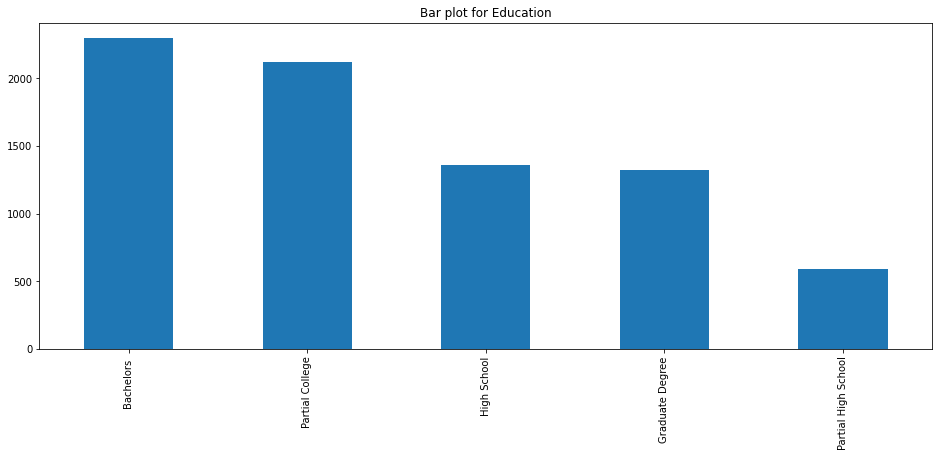

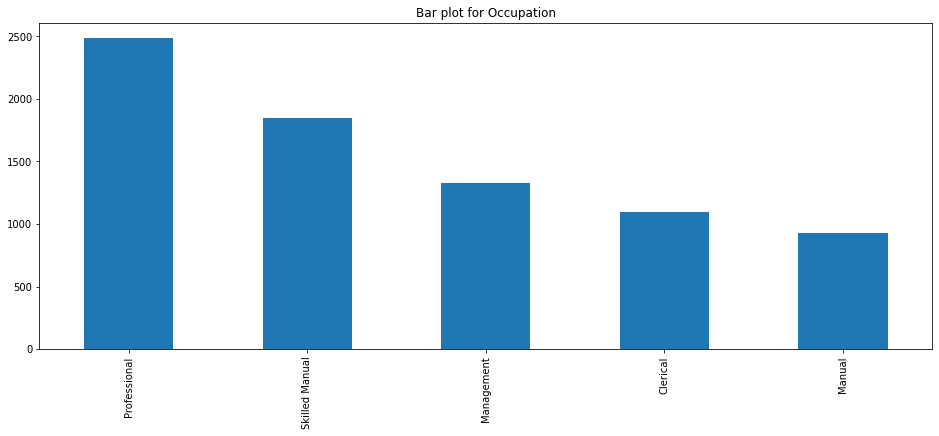

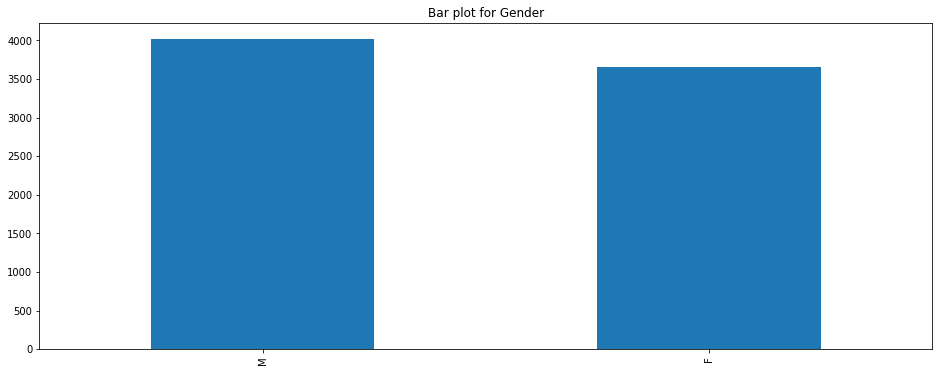

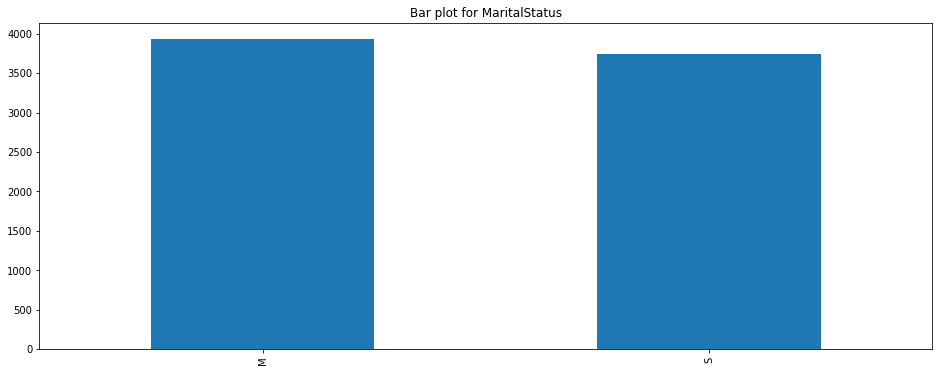

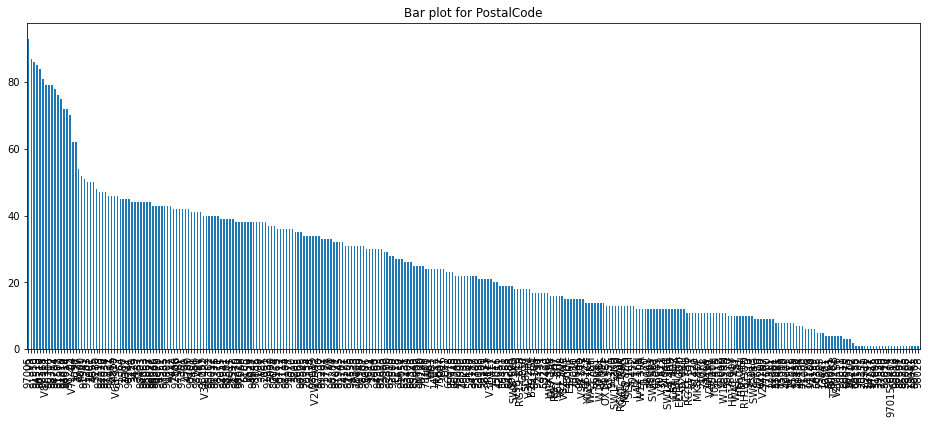

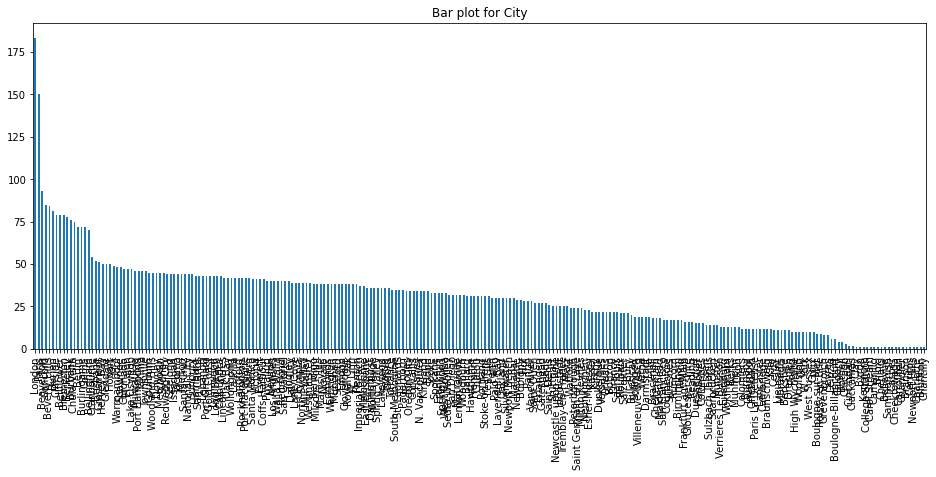

In [137]:
for col in categorical_cols:
    fig = plt.figure(figsize=(16,6)) # this is to define plot area
    ax = fig.gca() # to define axis  
    
    counts = data[col].value_counts() # find the counts for each unique category
    counts.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
    ax.set_title('Bar plot for ' + col)